<a href="https://colab.research.google.com/github/MMRES-PyBootcamp/MMRES-python-bootcamp2021/blob/master/11_misophonia_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 11 - Misophonia (second part)
When reporting the results of a study, we first describe the variables of interest in tables and figures.

We describe demographics (sex, age, marital status, etc..)

We describe outcome variables (misophonia)

We describe explanatory variables (cephalometric measures, anxiety, depression)

We then test the main hypotheses of the study.

We state the main relationships we want to study and formulate the statistical hypothesis (Introduction)

We describe how the study was performed and the statistical methods to test the hypothesis (Methods)

We describe the results of the hypothesis tests with statistics, and significance measures.

We illustrate the results with figures.




Are the state and trait correlated?

<div class="alert alert-block alert-success"><b>Practice:</b> 
Imagine we want to study the anxiety of participants in the misophonia study. We formulate the following hypothesis:

> Participants who enrolled in the study had an increased level of anxiety from their baseline (trait) that is related to their:
<ul>
  <li> age
  <li> sex
  <li> misophonia state.
</ul>
</div>

**This document is devised as a tool to enable your self-learning process. If you get stuck at some step or need any kind of help, please don't hesitate to raise your hand and ask for the teacher's guidance.**

---

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats



## Data loading

Let's begin again by loading Pandas with the `pd` alias and by importing the misophonia dataset `misophonia_data.xlsx` from the `/MMRES-python-bootcamp2022/datasets` sub-folder:

In [1]:
# Load package with its corresponding alias
import pandas as pd

# Reading an Excel SpreadSheet and storing it in as a DataFrame called `df`
df = pd.read_excel('https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2022/blob/main/datasets/misophoinia_data.xlsx?raw=true')

# Return the DataFrame
df

,Misofonia,Misofonia.dic,Estado,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada,ansiedad.medicada.dic,...,Edad,CLASE,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
0,si,4.0,divorciado,2.0,99.0,1.0,99.0,1.0,no,0.0,...,44.0,III,7.97,13.0,89.6,1.5,1.0,21.0,14.0,0.0
1,si,2.0,casado,1.0,75.0,1.0,75.0,1.0,no,0.0,...,43.0,II,18.23,-5.0,107.2,7.3,0.0,14.0,13.0,0.0
2,no,0.0,divorciado,2.0,77.0,1.0,55.0,0.0,no,0.0,...,24.0,I,12.27,11.5,101.4,5.0,NaN,NaN,NaN,-22.0
3,si,3.0,casado,1.0,95.0,1.0,99.0,1.0,no,0.0,...,33.0,III,7.81,16.8,75.3,2.7,1.0,NaN,NaN,4.0
4,no,0.0,casado,1.0,30.0,0.0,40.0,0.0,no,0.0,...,41.0,I,9.81,33.0,105.5,6.0,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,12.0,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN


## Data description

Here is the description of the variables

[1] “Misofonia”: Binary (si: misophinic, no: no misophinic)

[2] “Misofonia.dic”: Categorical (0: no misophinic, 1: severity 1, 2: severity 2, 3: severity 3, 4: severity 4)

[3] “Estado”: Marital status (casado: married, soltero: single, viuda: widow, divorciado:divorced)

[4] “Estado.dic”: Numeric Marital status

[5] “ansiedad.rasgo”: Score from 0-100 with anxiety personality trait

[6] “ansiedad.rasgo.dic”: Binary score (0,1) of anxiety personality trait

[7] “ansiedad.estado”: Score from 0-100 with current state of anxiety

[8] “ansiedad.estado.dic”: Binary score (0,1) with current state of anxiety

[9] “ansiedad.medicada”: Diagnosed with anxiety disorder (si, no)

[10] “ansiedad.medicada.dic”: Diagnosed with anxiety disorder (1, 0)

[11] “depresion”: Score from 0-50 with current state of depression

[12] “depresion.dic” : Binary score (0,1) with current state of depression

[13] “Sexo”: Male=H, Female:M

[14] “Edad”: Age

[15] “CLASE”: Type of jaw

[16] “Angulo_convexidad”: convexity angle

[17] “protusion.mandibular”: Projection of the jaw [18] “Angulo_cuelloYtercio”: angle between jaw and neck [19] “Subnasal_H”: Nasal angle

[20] “cambio.autoconcepto”: Whether people changed their self-concept after treatment.

[21] “Misofonia.post”: Misophionia diagnosed (A-MISO) after an educational program, where patients were made aware of a condition called misophonia.

[22] “Misofonia.pre”: Misophionia diagnosed (A-MISO) before an educational program, where patients were made aware of a condition called misophonia

[23] “ansiedad.dif”: Difference between anxiety state and anxiety trait scores

<br><br>

When reporting the results of a study, we first describe the variables of interest in tables and figures.

We describe demographics (sex, age, marital status, etc..)

We describe outcome variables (misophonia)

## 1. Correlation

Are the state and trait correlated?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


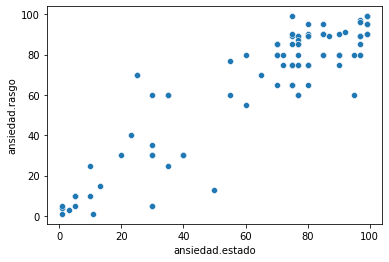

In [5]:
sns.scatterplot(df['ansiedad.estado'],df['ansiedad.rasgo'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


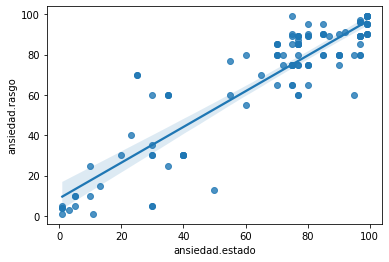

In [18]:
sns.regplot(df['ansiedad.estado'],df['ansiedad.rasgo'])

In [9]:
df['ansiedad.estado'].corr(df['ansiedad.rasgo'],method='pearson')

0.9041608592851859

In [14]:
# what happens here?
stats.linregress(df['ansiedad.estado'],df['ansiedad.rasgo'])

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

In [15]:
# Let's remove NA values
mask = ~np.isnan(df['ansiedad.estado']) & ~np.isnan(df['ansiedad.rasgo'])
stats.linregress(df[mask]['ansiedad.estado'],df[mask]['ansiedad.rasgo'])

LinregressResult(slope=0.8852595363554459, intercept=8.704259427458922, rvalue=0.9041608592851861, pvalue=1.6144910361829564e-46, stderr=0.03802379838485532, intercept_stderr=2.8140075434387404)

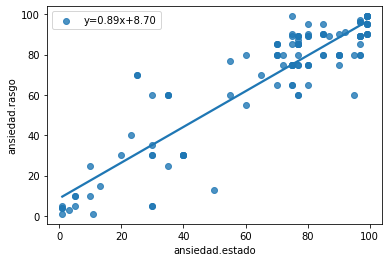

In [17]:
slope, intercept, r_value, pv, se = stats.linregress(df[mask]['ansiedad.estado'],df[mask]['ansiedad.rasgo'])
sns.regplot(x="ansiedad.estado", y="ansiedad.rasgo", data=df[mask], 
      ci=None, label="y={0:.2f}x+{1:.2f}".format(slope, intercept)).legend(loc="best")

## Student’s t-test
We are interested in the variable misofonia.dif, that is the observed excess of anxiety from the trait (excess=state−trait)

Is excess in anxiety higher than 0?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


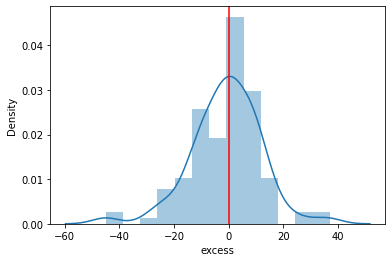

In [22]:
df['excess']=df['ansiedad.estado']-df['ansiedad.rasgo']
sns.distplot(df['excess'])
plt.axvline(0,color='r')

In [23]:
df['excess'].describe()

count    123.000000
mean      -0.918699
std       12.866014
min      -45.000000
25%       -8.000000
50%        0.000000
75%        8.000000
max       37.000000
Name: excess, dtype: float64

scipy.stats.ttest_1samp() tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value:

In [24]:
res=stats.ttest_1samp(df['excess'], 0) 
print (res[0])

# What's wrong?

nan


In [26]:
# let's remove missing values
res=stats.ttest_1samp(df['excess'].dropna(), 0) 
print (res)


Ttest_1sampResult(statistic=-0.7919210074245916, pvalue=0.42994382746707327)


In [27]:
# or let's just ignore missing values
res=stats.ttest_1samp(df['excess'], 0,nan_policy='omit') 
print (res)

Ttest_1sampResult(statistic=-0.7919210074245917, pvalue=0.4299438274670726)


We do not see significant large values of the difference in anxiety; Enrollment in the study does not seem to detect individuals with an excess of anxiety.

Is excess in anxiety higher than 0 for men and women separately?
We first describe the conditional distributions



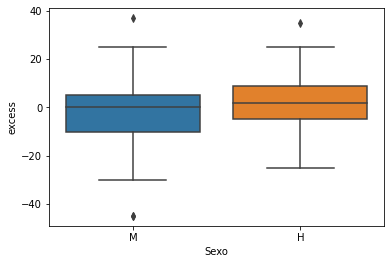

In [28]:
sns.boxplot(data=df, y='excess',x='Sexo')


We perform the hypothesis test for each sex separately


In [31]:
# Males
res=stats.ttest_1samp(df[df['Sexo']=='H']['excess'], 0,nan_policy='omit') 
print (res)


Ttest_1sampResult(statistic=1.1157597994294637, pvalue=0.27058167900144414)


In [32]:
# Females
res=stats.ttest_1samp(df[df['Sexo']=='M']['excess'], 0,nan_policy='omit') 
print (res)

Ttest_1sampResult(statistic=-1.69939094369864, pvalue=0.09328238337986067)


## 2-sample t-test: testing for difference across populations

We see that women (M) have a reduction in the excess of anxiety (almost significant), while men (H) had an increase (no significant). Why? perhaps because females tend to consult doctors before men do.

Is the excess of anxiety significantly different between the sexes?

To test if this is significant, we do a 2-sample t-test with scipy.stats.ttest_ind():

In [33]:
female_excess = df[df['Sexo']=='M']['excess']
male_excess = df[df['Sexo']=='H']['excess']
stats.ttest_ind(female_excess, male_excess) 

Ttest_indResult(statistic=-1.8868246077434936, pvalue=0.06158024922060582)

We see that the difference between the group means is within the limit of significance with women having less excess anxiety than men.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


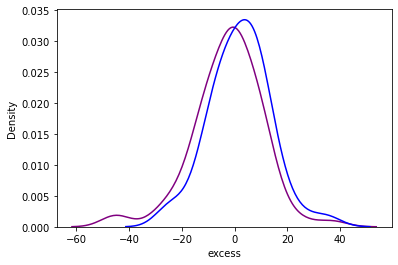

In [34]:
sns.distplot(female_excess,hist=False,color='purple')
sns.distplot(male_excess,hist=False,color='blue')


## Lineal model
Given two sets of observations, sex and excess of anxiety, we want to test the hypothesis that excess of anxiety is a linear function of sex.



In [35]:
from statsmodels.formula.api import ols
model = ols("excess ~ Sexo", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 excess   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.560
Date:                Thu, 25 Aug 2022   Prob (F-statistic):             0.0616
Time:                        15:22:18   Log-Likelihood:                -486.46
No. Observations:                 123   AIC:                             976.9
Df Residuals:                     121   BIC:                             982.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9333      1.898      1.019      0.3


Is excess in anxiety higher in older people?


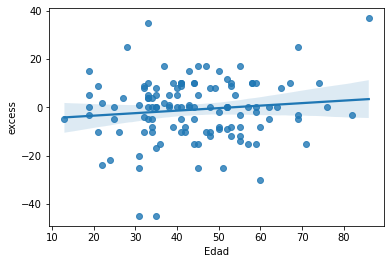

In [37]:
sns.regplot(data=df, x='Edad', y='excess')

In [38]:
# We fit the regression model
model = ols("excess ~ Edad", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 excess   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.615
Date:                Thu, 25 Aug 2022   Prob (F-statistic):              0.206
Time:                        15:26:42   Log-Likelihood:                -487.43
No. Observations:                 123   AIC:                             978.9
Df Residuals:                     121   BIC:                             984.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.4917      3.780     -1.453      0.1

The association, while positive it is not significant. What happens if we adjust by sex?



In [39]:
model = ols("excess ~ Edad + Sexo", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 excess   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.170
Date:                Thu, 25 Aug 2022   Prob (F-statistic):             0.0455
Time:                        15:27:56   Log-Likelihood:                -485.08
No. Observations:                 123   AIC:                             976.2
Df Residuals:                     120   BIC:                             984.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5718      3.828     -0.933      0.3

If we adjust by sex the association is a bit stronger but still not significant.

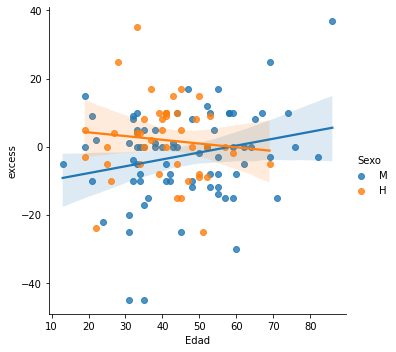

In [42]:
sns.lmplot(data=df, x='Edad', y='excess', hue='Sexo')

Is excess in anxiety different between monophonic grades?


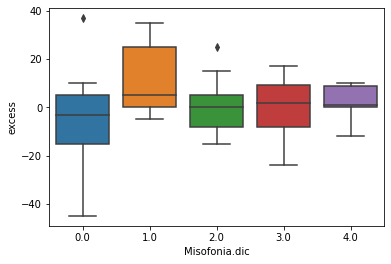

In [43]:
sns.boxplot(data=df, y='excess',x= 'Misofonia.dic')

We test the hypothesizes H0: means excess of anxiety are equal accross misophonic categories against H1: at least one of them is different

In [47]:
model = ols("excess ~ Misofonia.dic", df).fit()
print(model.summary())

PatsyError: ignored

In [55]:
# what happened here!!??
# OLS has some requirements regarding variable names... it is a bit picky...

# let's rename this variable:
df=df.rename(columns={'Misofonia.dic':'misophonic'})

# or alternatively you can just create an additional column with a different name
#df['misophonic']=df['Misophonia.dic']

model = ols("excess ~ misophonic", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 excess   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     5.177
Date:                Thu, 25 Aug 2022   Prob (F-statistic):             0.0246
Time:                        16:08:22   Log-Likelihood:                -485.67
No. Observations:                 123   AIC:                             975.3
Df Residuals:                     121   BIC:                             981.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1694      1.828     -2.281      0.0

Notice that misophonic variable was treated as a quantitative trait and not as a categorical factor

In [58]:
df['misophonic']=df['misophonic'].astype('category')
model = ols("excess ~ misophonic", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 excess   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     3.090
Date:                Thu, 25 Aug 2022   Prob (F-statistic):             0.0185
Time:                        16:08:52   Log-Likelihood:                -482.11
No. Observations:                 123   AIC:                             974.2
Df Residuals:                     118   BIC:                             988.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.0976      1.94

In [64]:
from statsmodels.stats import anova
anova.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
misophonic,4.0,1915.038826,478.759707,3.090437,0.018466
Residual,118.0,18280.148165,154.916510,NaN,NaN


We see that anxiety excess of misophonia grade 1 is significantly higher than misophonia grade 0 (no misophonia), as it is grade 3. The ANOVA table shows that we accept the alternative hypothesis, where the differences between groups are significantly higher than within groups.

Are the differences in excess in anxiety between monophonic grades modulated by sex?


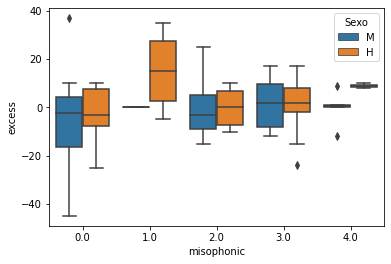

In [67]:
sns.boxplot(data=df, y='excess',x='misophonic',hue='Sexo')
#boxplot(excess ~ misophonic, subset = which(sex=="H"))

In [68]:
model = ols("excess ~ misophonic * Sexo", df).fit()
print(model.summary())
#anova(mod)

                            OLS Regression Results                            
Dep. Variable:                 excess   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.677
Date:                Thu, 25 Aug 2022   Prob (F-statistic):              0.103
Time:                        16:39:10   Log-Likelihood:                -480.53
No. Observations:                 123   AIC:                             981.1
Df Residuals:                     113   BIC:                             1009.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [69]:
anova.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
misophonic,4.0,1915.038826,478.759707,3.036607,0.020259
Sexo,1.0,179.743120,179.743120,1.140048,0.287918
misophonic:Sexo,4.0,284.519790,71.129947,0.451153,0.771365
Residual,113.0,17815.885256,157.662701,NaN,NaN


We do not see a significant interaction (modulation) of the effect of sex on the group differences.

We cannot say that the profiles of anxiety excess across misophonia grades are different between sexes.